In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn
from tensorflow.keras import backend as K
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D,MaxPooling2D, LeakyReLU
from tensorflow.keras.callbacks import TensorBoard
import pickle
from PIL import Image
import time
import os
from PIL import Image
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split

In [ ]:
dim = (176,208)
test_split_percent = .1
validation_split_percent = .2
zoom = [.99,1.01]
bright_range = [.8,1.2]
layers_unlocked = True
lr = 0.0001
batch = 20
eps = 20
momentum = .9
save_model_name = "val%2d_epochs%d"%(validation_split_percent*100,eps)
print(save_model_name)

val20_epochs20


In [ ]:
train_dr =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,fill_mode='constant',cval=0,brightness_range=bright_range,zoom_range=zoom,data_format='channels_last',zca_whitening=False)
train_data_gen =train_dr.flow_from_directory(directory="/content/drive/MyDrive/Alzheimer_s Dataset_1/train/",target_size=dim, batch_size=5000)

Found 5151 images belonging to 4 classes.


In [ ]:
test_dr =tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,fill_mode='constant',cval=0,zoom_range=[1,1],data_format='channels_last')
test_data_gen =test_dr.flow_from_directory(directory="/content/drive/MyDrive/Alzheimer_s Dataset_1/test",target_size=dim,batch_size=5000, shuffle = False)

Found 1289 images belonging to 4 classes.


In [ ]:
train_data,train_labels = train_data_gen.next()
test_data,test_labels = test_data_gen.next()  #iteration for every label in the dataset



In [ ]:
def visualize(direction):
  list_dir=os.listdir(direction)
  plt.figure(figsize=(14,8))
  for i in range(1,7):
    plt.subplot(2,3,i)
    img= plt.imread(os.path.join(direction,list_dir[i]))
    plt.imshow(img,cmap='gray')
    plt.axis('off')
  plt.tight_layout()

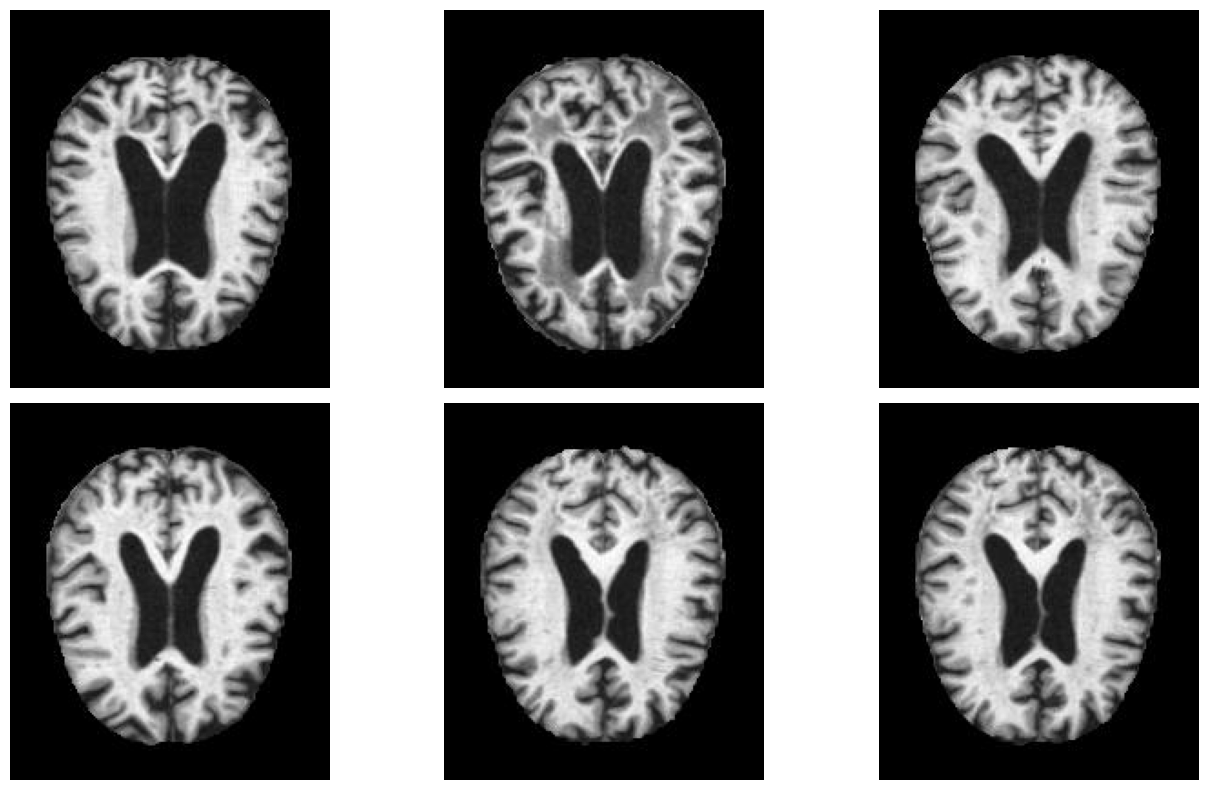

In [ ]:
MildDemented_dir= '/content/drive/MyDrive/Alzheimer_s Dataset_1/test/MildDemented'
visualize(MildDemented_dir)      #example visualising for mild dementia

In [ ]:
total_data = np.concatenate((train_data,test_data))
total_labels = np.concatenate((train_labels,test_labels))
print(total_data.shape)
print(total_labels.shape)

(6289, 176, 208, 3)
(6289, 4)


In [ ]:
initial_split = test_split_percent+validation_split_percent
test_val_split = test_split_percent/initial_split
train_data, test_val_data, train_labels, test_val_labels =train_test_split(total_data,total_labels,test_size=initial_split)
test_data, val_data, test_labels, val_labels =train_test_split(test_val_data,test_val_labels,test_size=test_val_split)

In [ ]:
print('train: ',train_data.shape)
print('validation',val_data.shape)
print('test',test_data.shape)

train:  (4402, 176, 208, 3)
validation (629, 176, 208, 3)
test (1258, 176, 208, 3)


In [ ]:
print(train_data.shape)
print(train_labels.shape)
print(val_data.shape)
print(val_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(4402, 176, 208, 3)
(4402, 4)
(629, 176, 208, 3)
(629, 4)
(1258, 176, 208, 3)
(1258, 4)


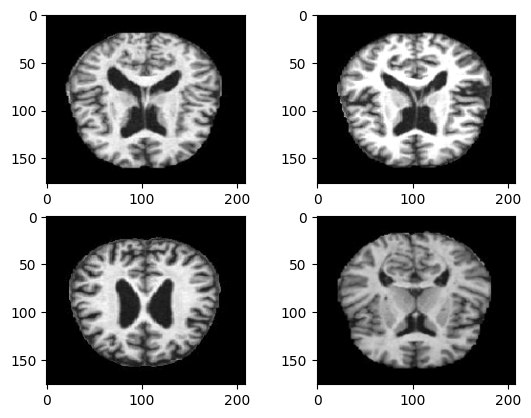

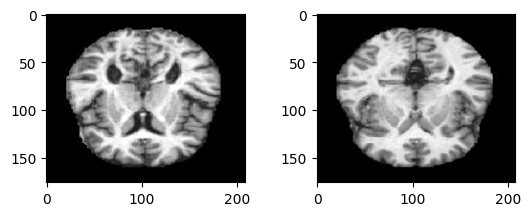

In [ ]:
plt.subplot(221)                         #differnt classes of images are plotted
plt.imshow(train_data[1,:,:,:])
plt.subplot(222)
plt.imshow(train_data[2,:,:,:])
plt.subplot(223)
plt.imshow(val_data[3,:,:,:])
plt.subplot(224)
plt.imshow(val_data[4,:,:,:])
plt.show()
plt.subplot(221)
plt.imshow(test_data[5,:,:,:])
plt.subplot(222)
plt.imshow(test_data[154,:,:,:])

In [ ]:
print(np.amax(train_data))
print(np.amin(train_data))
print(np.amax(val_data))
print(np.amin(val_data))

1.0
0.0
1.0
0.0


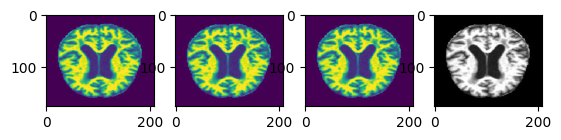

In [ ]:
plt.subplot(141)
plt.imshow(train_data[3,:,:,0])
plt.subplot(142)
plt.imshow(train_data[3,:,:,1])
plt.subplot(143)
plt.imshow(train_data[3,:,:,2])
plt.subplot(144)
plt.imshow(train_data[3,:,:,:])

VGG MODEL

In [ ]:
# vg_model =tf.keras.applications.vgg16.VGG16(include_top=False,input_shape=(dim[0],dim[1],3), pooling = 'max')

In [ ]:
# vg_model.get_layer('block1_conv1').trainable = layers_unlocked
# vg_model.get_layer('block1_conv2').trainable = layers_unlocked
# vg_model.get_layer('block2_conv1').trainable = layers_unlocked
# vg_model.get_layer('block2_conv2').trainable = layers_unlocked
# vg_model.get_layer('block3_conv1').trainable = layers_unlocked
# vg_model.get_layer('block3_conv2').trainable = layers_unlocked
# vg_model.get_layer('block3_conv3').trainable = layers_unlocked
# vg_model.get_layer('block4_conv1').trainable = layers_unlocked
# vg_model.get_layer('block4_conv2').trainable = layers_unlocked
# vg_model.get_layer('block4_conv3').trainable = layers_unlocked
# flat = Flatten()(vg_model.output)
# fc1 = Dense(1024,activation='relu', kernel_initializer='he_uniform')(flat)
# dp1 = Dropout(0.25)(fc1)
# output = Dense(4,activation='softmax')(dp1)
# vg_model = Model(inputs=vg_model.inputs, outputs=output)
# vg_model.summary()

In [ ]:
# opt = tf.keras.optimizers.SGD(learning_rate=lr, momentum=momentum,nesterov=True,name='SGD')
# vg_model.compile(optimizer=opt, loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
# model_history =vg_model.fit(train_data,train_labels,validation_data=(val_data,val_labels),epochs=eps,batch_size=batch, shuffle=True)
# scores = vg_model.evaluate(train_data, train_labels)
# print("Accuracy: %.2f%%" %(scores[1]*100))

In [ ]:
# vg_model.save("model_new.h5")

In [ ]:
# plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# plt.title('Accuracy per Epoch')
# plt.plot(np.linspace(1,eps,num=eps),model_history.history['acc'], label = 'TrainingAccuracy')
# plt.plot(np.linspace(1,eps,num=eps),model_history.history['val_acc'], label ='Validation Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend()
# plt.show()

In [ ]:
# plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
# plt.title('Loss per Epoch')
# plt.plot(np.linspace(1,eps,num=eps),model_history.history['loss'], label = 'TrainingLoss')
# plt.plot(np.linspace(1,eps,num=eps),model_history.history['val_loss'], label ='Validation Loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend()
# plt.show()

In [ ]:
# print('image dimensions: ',dim)
# print('validation split percentage: ',validation_split_percent)
# print('zoom: ',zoom)
# print('Learning Rate: ',lr)
# print('batch size: ',batch)
# print('epochs: ',eps)
# print('brightness range: ',bright_range)
# print('Model trained from scratch? : ',layers_unlocked)
# end = time.time()
# print('Total Time Elapsed = %.2d minutes'%((end - start)/60))

In [ ]:
vg_model = load_model("/content/drive/MyDrive/VGG.hdf5")

In [ ]:
train_scores = vg_model.evaluate(train_data, train_labels)
val_scores = vg_model.evaluate(val_data,val_labels)
test_scores = vg_model.evaluate(test_data, test_labels)

40/40 [==============================] - 6s 150ms/step - loss: 0.0445 - accuracy: 0.9857


In [ ]:
print('Train Accuracy: %.2f%%'%(train_scores[1]*100))
print('Validation Accuracy: %.2f%%'%(val_scores[1]*100))
print('Test Accuracy: %.2f%%'%(test_scores[1]*100))

Train Accuracy: 98.66%
Validation Accuracy: 99.05%
Test Accuracy: 98.57%


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
predic = vg_model.predict(test_data)
predic = np.argmax(predic, axis=1)
labels = np.argmax(test_labels, axis=1)

40/40 [==============================] - 4s 92ms/step


In [ ]:
conf_arr = confusion_matrix(labels, predic)

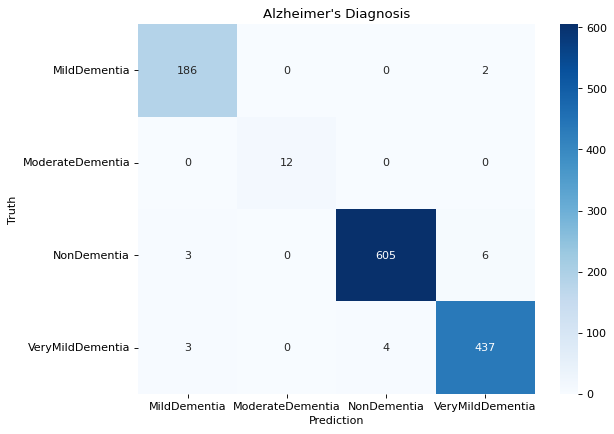

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(conf_arr, cmap='Blues', annot=True, fmt='d',
xticklabels=['MildDementia', 'ModerateDementia', 'NonDementia',
'VeryMildDementia'],
yticklabels=['MildDementia', 'ModerateDementia', 'NonDementia',
'VeryMildDementia'])
plt.title('Alzheimer\'s Diagnosis')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)
plt.savefig("confusion_matrix.png")

In [ ]:
class_report = classification_report(labels, predic, target_names=['MildDementia',
'ModerateDementia', 'NonDementia', 'VeryMildDementia'])

In [ ]:
print("Classification Report:\n", class_report)

Classification Report:
                   precision    recall  f1-score   support

    MildDementia       0.97      0.99      0.98       188
ModerateDementia       1.00      1.00      1.00        12
     NonDementia       0.99      0.99      0.99       614
VeryMildDementia       0.98      0.98      0.98       444

        accuracy                           0.99      1258
       macro avg       0.99      0.99      0.99      1258
    weighted avg       0.99      0.99      0.99      1258



In [ ]:
import matplotlib.pyplot as plt

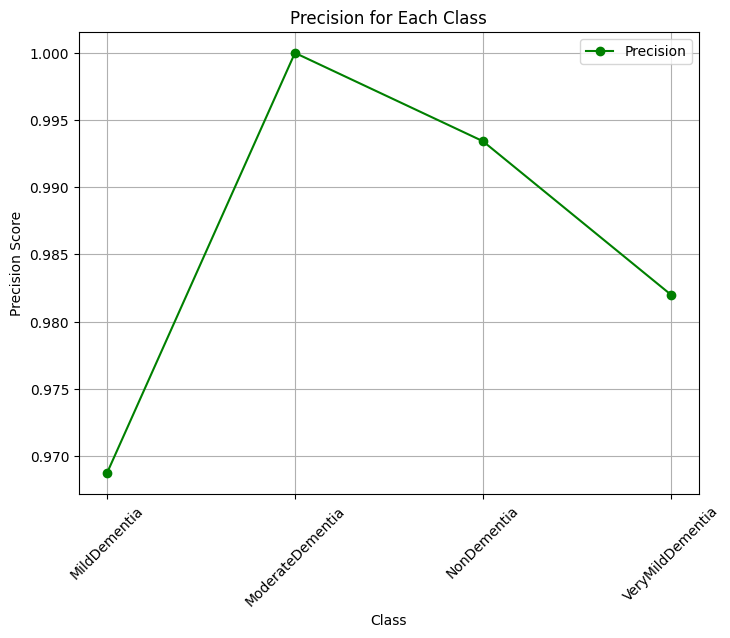

In [ ]:
precision = np.diag(conf_arr) / np.sum(conf_arr, axis=0)
recall = np.diag(conf_arr) / np.sum(conf_arr, axis=1)
f1_score = 2 * (precision * recall) / (precision + recall)
class_names=['MildDementia', 'ModerateDementia', 'NonDementia',
'VeryMildDementia']
plt.figure(figsize=(8, 6))
plt.plot(class_names, precision, marker='o', label='Precision', color='green')
plt.title('Precision for Each Class')
plt.xlabel('Class')
plt.ylabel('Precision Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.savefig("precision_line_plot.png")
plt.show()

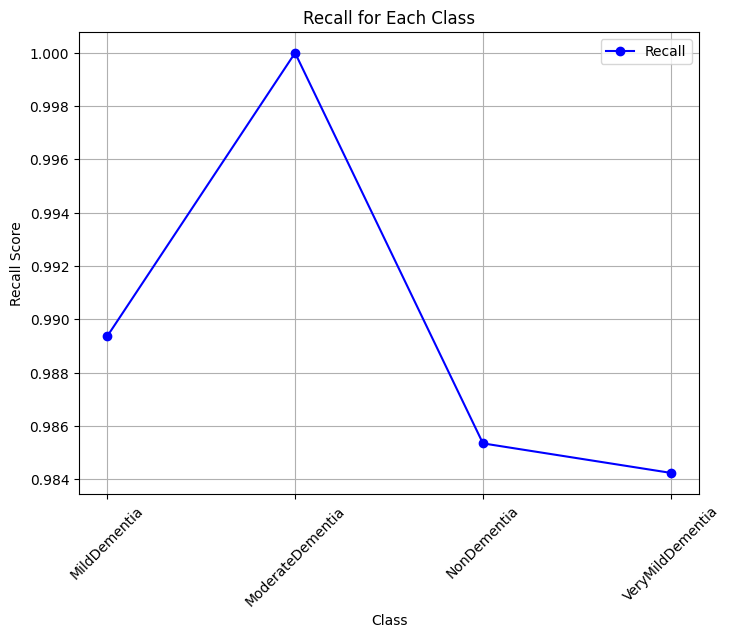

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(class_names, recall, marker='o', label='Recall', color='blue')
plt.title('Recall for Each Class')
plt.xlabel('Class')
plt.ylabel('Recall Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.savefig("recall_line_plot.png")
plt.show()

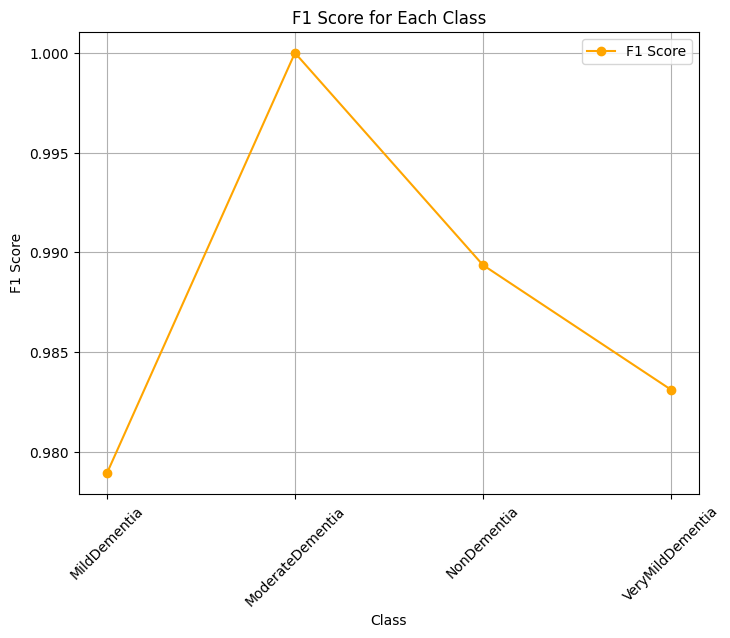

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(class_names, f1_score, marker='o', label='F1 Score', color='orange')
plt.title('F1 Score for Each Class')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.savefig("f1_score_line_plot.png")
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
predic = vg_model.predict(test_data)
labels = label_binarize(np.argmax(test_labels, axis=1), classes=[0, 1, 2, 3])
predic = label_binarize(np.argmax(predic, axis=1), classes=[0, 1, 2, 3])

40/40 [==============================] - 4s 94ms/step


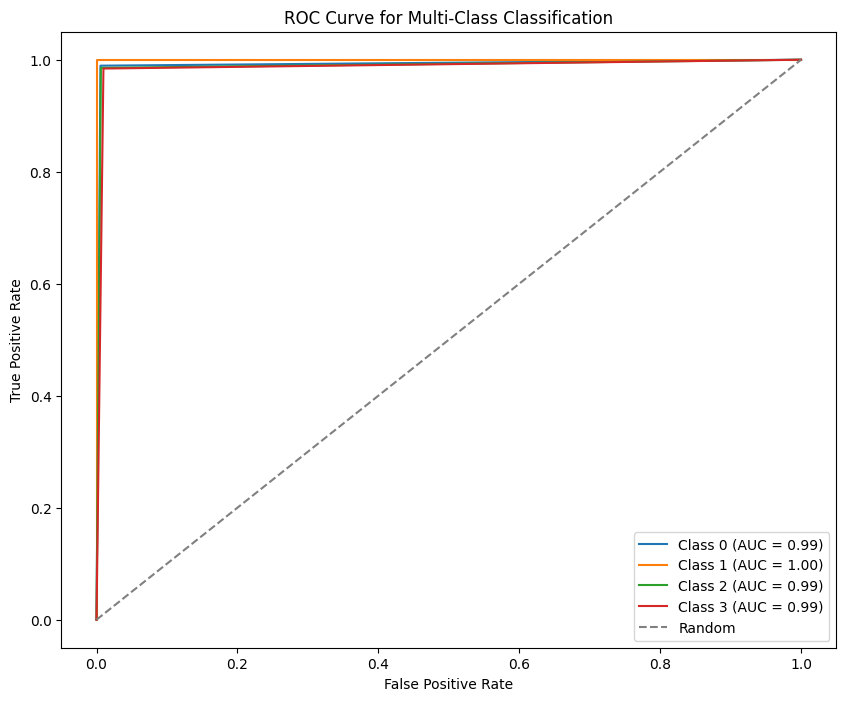

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(labels.shape[1]):
  fpr[i], tpr[i], _ = roc_curve(labels[:, i], predic[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure(figsize=(10, 8))
for i in range(labels.shape[1]):
  plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()